In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
df=pd.read_csv('merge_video_game.csv',
               index_col = 0)

In [153]:
df

,Name,year,game_type,rate,votes,Rank,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,grand theft auto: san andreas,2004.0,"Action, Crime",9.4,37707.0,18,PS2,9.43,0.40,0.41,10.57,20.81
1,grand theft auto: san andreas,2004.0,"Action, Crime",9.4,37707.0,875,XB,1.26,0.61,0.00,0.09,1.95
2,grand theft auto: san andreas,2004.0,"Action, Crime",9.4,37707.0,2122,PC,0.00,0.92,0.00,0.05,0.98
3,grand theft auto: san andreas,2004.0,"Action, Crime",9.4,37707.0,9829,X360,0.08,0.03,0.00,0.01,0.12
4,grand theft auto v,2013.0,"Action, Crime, Drama",9.5,55589.0,17,PS3,7.01,9.27,0.97,4.14,21.40
...,...,...,...,...,...,...,...,...,...,...,...,...
401,the wolf among us,2013.0,"Action, Crime, Drama",8.9,6571.0,11939,PSV,0.05,0.00,0.00,0.02,0.07
402,the wolf among us,2013.0,"Action, Crime, Drama",8.9,6571.0,13683,X360,0.01,0.03,0.00,0.00,0.04
403,true crime: new york city,2005.0,"Action, Adventure, Crime",7.0,897.0,2723,PS2,0.57,0.02,0.07,0.09,0.76
404,true crime: new york city,2005.0,"Action, Adventure, Crime",7.0,897.0,6244,XB,0.21,0.06,0.00,0.01,0.28


In [173]:
df['Platform'].unique()

array(['PS2', 'XB', 'PC', 'X360', 'PS3', 'PS4', 'XOne', '2600', 'PS',
       'N64', 'WiiU', 'GC', 'PSV', 'Wii', 'DS', 'GBA', 'PSP', 'GB', '3DS'],
      dtype=object)

In [144]:
df.describe()

,year,rate,votes,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,400.000000,400.000000,400.00000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,2010.690000,8.361500,10301.84750,3300.448276,1.188498,0.775369,0.067291,0.294064,2.325493
std,4.482648,0.743539,9602.18746,3820.563391,1.731449,1.083115,0.185191,0.663309,3.225921
min,1997.000000,6.400000,536.00000,17.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2008.000000,8.000000,4105.25000,455.000000,0.170000,0.130000,0.000000,0.040000,0.430000
50%,2012.000000,8.400000,6951.00000,1891.500000,0.555000,0.400000,0.000000,0.110000,1.085000
75%,2014.000000,8.925000,14673.00000,4508.500000,1.407500,0.977500,0.060000,0.310000,3.070000
max,2023.000000,9.700000,55776.00000,16375.000000,9.670000,9.270000,2.020000,10.570000,21.400000


In [145]:
df.isna().sum()

Name            0
year            6
game_type       0
rate            6
votes           6
Rank            0
Platform        0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [146]:
df.dropna(inplace=True)

In [147]:
df.isna().sum()

Name            0
year            0
game_type       0
rate            0
votes           0
Rank            0
Platform        0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## baseline model

In [162]:
#cols = ['year','rate','votes','Rank','NA_Sales','EU_Sales','JP_Sales','Other_Sales']
cols=['rate','votes']
x = df[cols]
y = df.Global_Sales

In [163]:
lr = LinearRegression()# y=mx+c 
fit = lr.fit(x,y)

In [164]:
lr.score(x,y)

0.23747996294803853

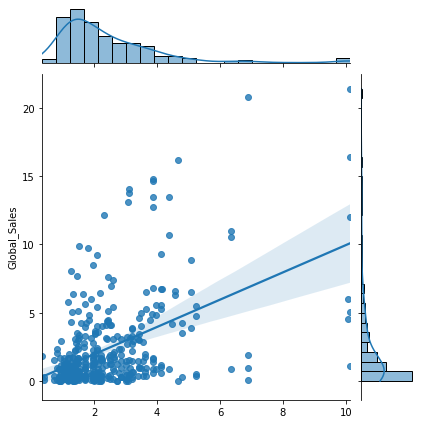

In [165]:
preds = lm.predict(x) # generate predictions (on training data) using fit model

sns.jointplot(x=preds,y=y, kind='reg')

In [166]:
model = sm.OLS(y,x)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Global_Sales   R-squared (uncentered):                   0.492
Model:                            OLS   Adj. R-squared (uncentered):              0.490
Method:                 Least Squares   F-statistic:                              190.1
Date:                Wed, 01 Dec 2021   Prob (F-statistic):                    1.98e-58
Time:                        09:13:16   Log-Likelihood:                         -974.06
No. Observations:                 394   AIC:                                      1952.
Df Residuals:                     392   BIC:                                      1960.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rate           0.0781      0.027      2.923      0.004       0.026       0.131
votes          0.0002   1.58e-05     10.200      0.000       0.000       0.000
==============================================================================
Omnibus:                      165.227   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              691.034
Skew:                           1.835   Prob(JB):                    8.79e-151
Kurtosis:                       8.350   Cond. No.                     2.61e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# hold out 20% of the data for final testing
x, X_test, y, y_test = train_test_split(x, y, test_size=.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state=10)

In [168]:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [169]:
#baseline model

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')
lm.fit(x,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

#exp1

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

#exp2

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.350
Linear Regression test R^2: 0.231
Ridge Regression val R^2: 0.349
Degree 2 polynomial regression val R^2: 0.313


In [170]:
# construct LinearRegression model object
lr = LinearRegression()# y=mx+c 
fit = lr.fit(x,y)

In [171]:
# extract feature coefficients and intercept from fit model
print(lr.intercept_)
print(lr.coef_)

4.928171531727601
[-5.32186840e-01  1.84762654e-04]


In [46]:
lr.score(x,y)

0.9999963175771603

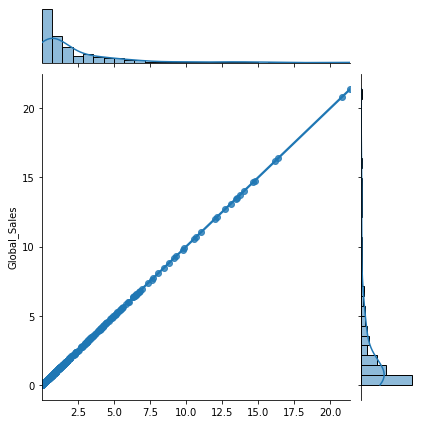

In [47]:
preds = lr.predict(x) # generate predictions (on training data) using fit model

sns.jointplot(x=preds,y=y, kind='reg')

In [48]:
model = sm.OLS(y,x)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Global_Sales   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.995e+07
Date:                Tue, 30 Nov 2021   Prob (F-statistic):                        0.00
Time:                        12:30:00   Log-Likelihood:                          1440.1
No. Observations:                 394   AIC:                                     -2864.
Df Residuals:                     386   BIC:                                     -2832.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
year        -1.684e-06   2.17e-06     -0.778      0.437   -5.94e-06    2.57e-06
rate            0.0004      0.001      0.671      0.503      -0.001       0.001
votes        4.647e-08   4.87e-08      0.954      0.341   -4.93e-08    1.42e-07
Rank         1.105e-07   9.62e-08      1.149      0.251   -7.86e-08       3e-07
NA_Sales        1.0000      0.000   3003.062      0.000       0.999       1.001
EU_Sales        0.9996      0.001   1793.616      0.000       0.998       1.001
JP_Sales        1.0005      0.002    503.074      0.000       0.997       1.004
Other_Sales     1.0000      0.001   1554.730      0.000       0.999       1.001
==============================================================================
Omnibus:                        1.779   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                1.619
Skew:                           0.048   Prob(JB):                        0.445
Kurtosis:                       2.701   Cond. No.                     9.06e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  use RMSE and MAE to determine errors


In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y, preds, squared=False)
mae = mean_absolute_error(y, preds)

In [50]:
print(rmse)
print(mae)

0.006257481455869881
0.004254953150339981
